In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all.7__all.7',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 10

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .7/

planck_wgt_flux = 2

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [108]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

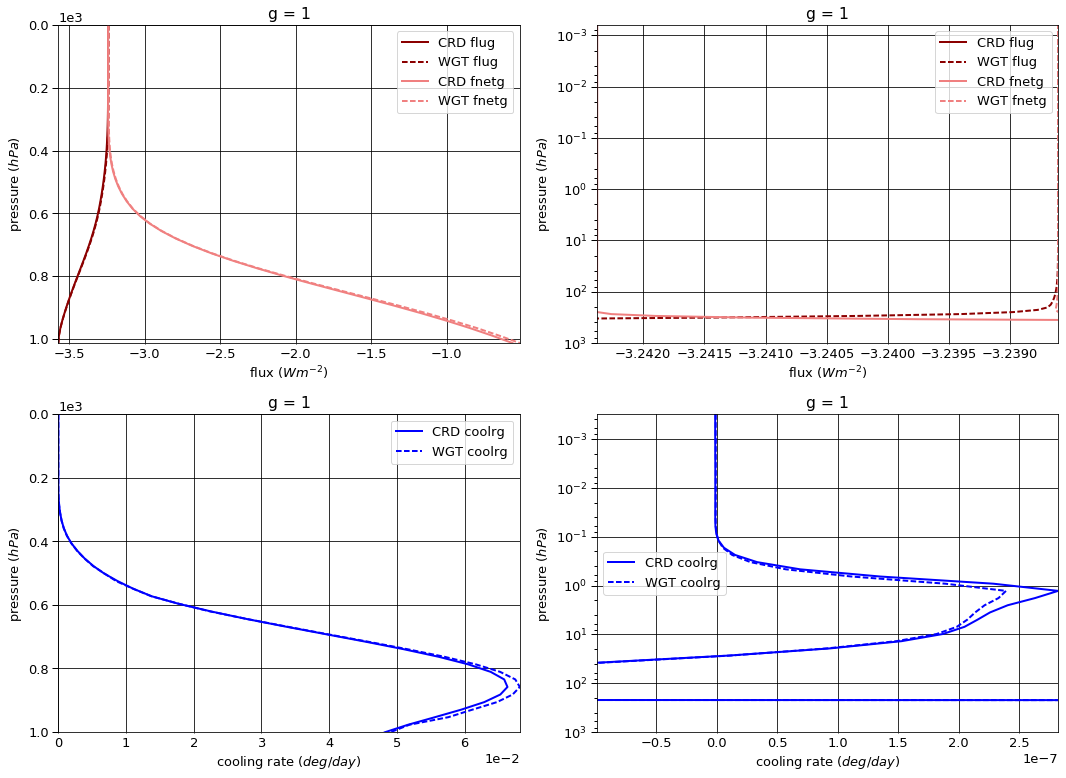

# Figure: flux, cooling rate g-group 2

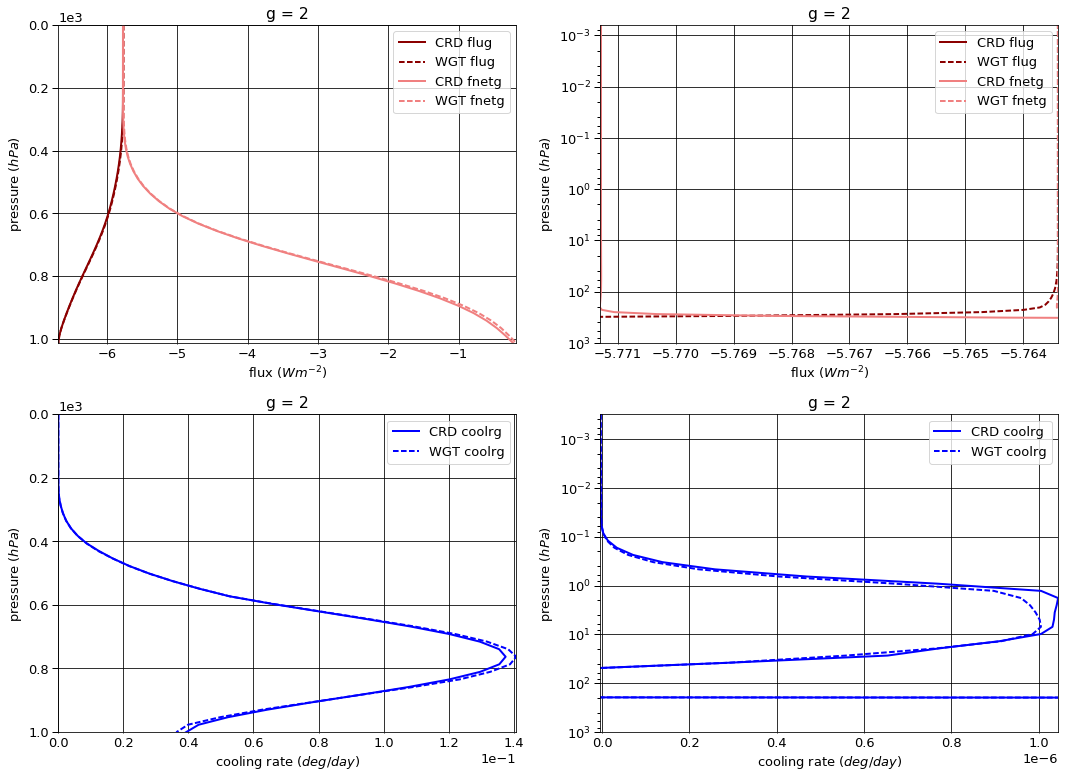

# Figure: flux, cooling rate g-group 3

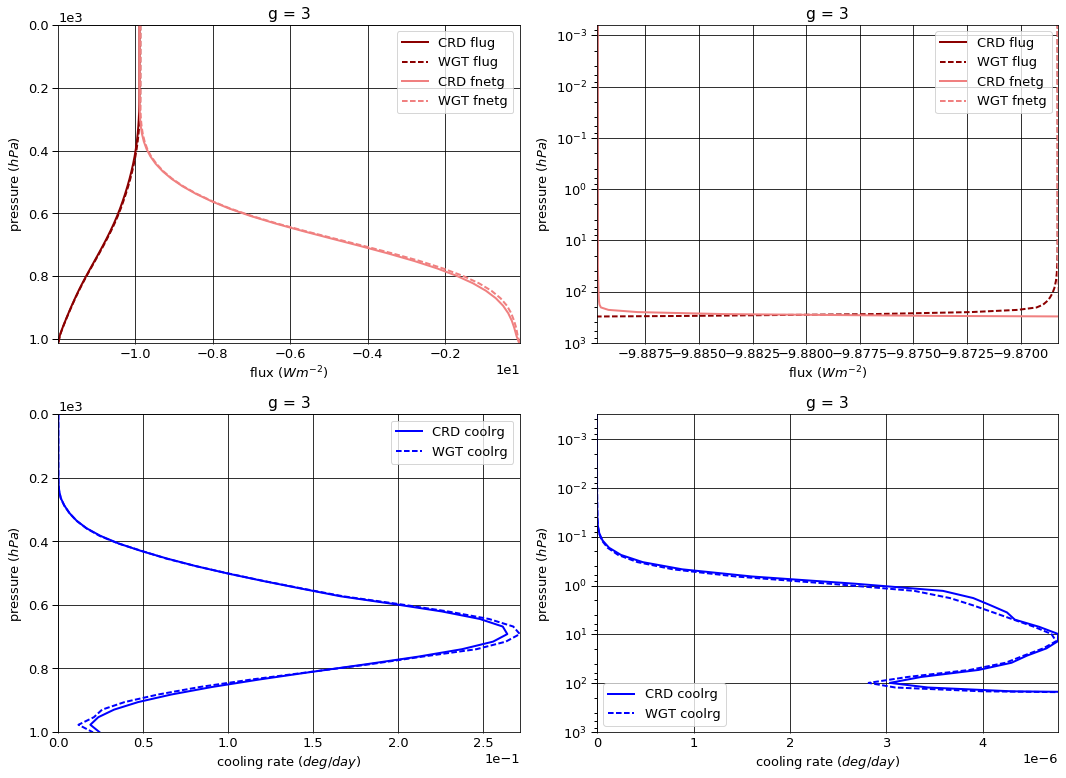

# Figure: flux, cooling rate g-group 4

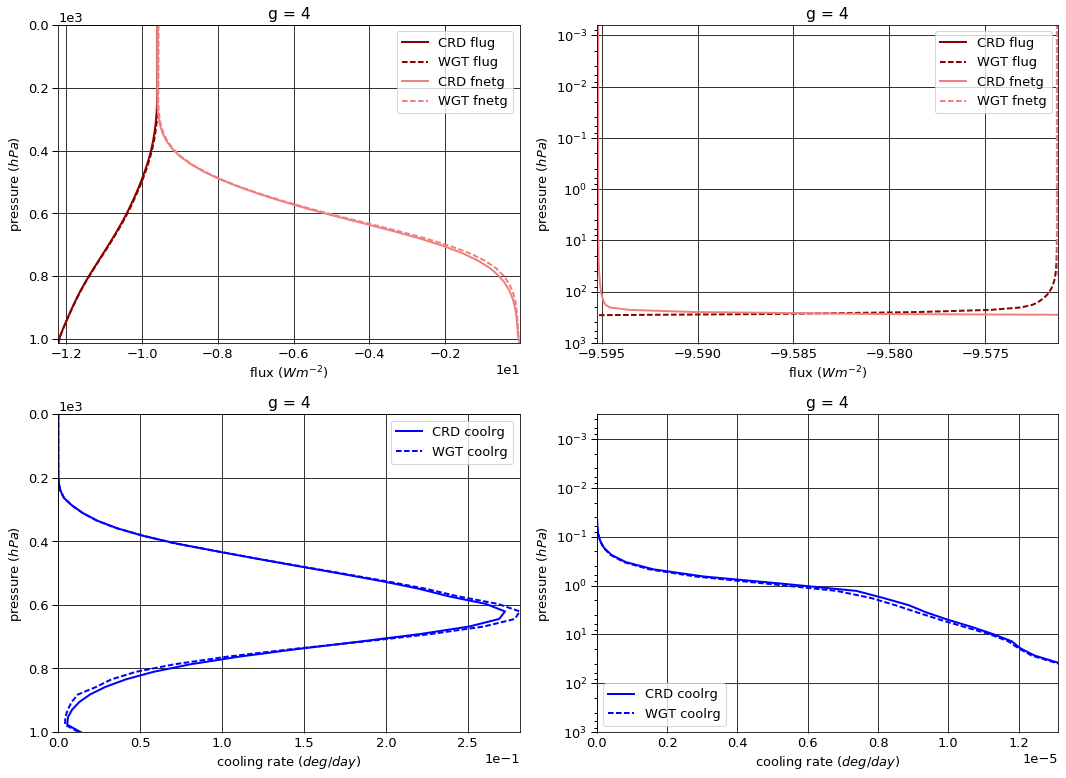

# Figure: flux, cooling rate g-group 5

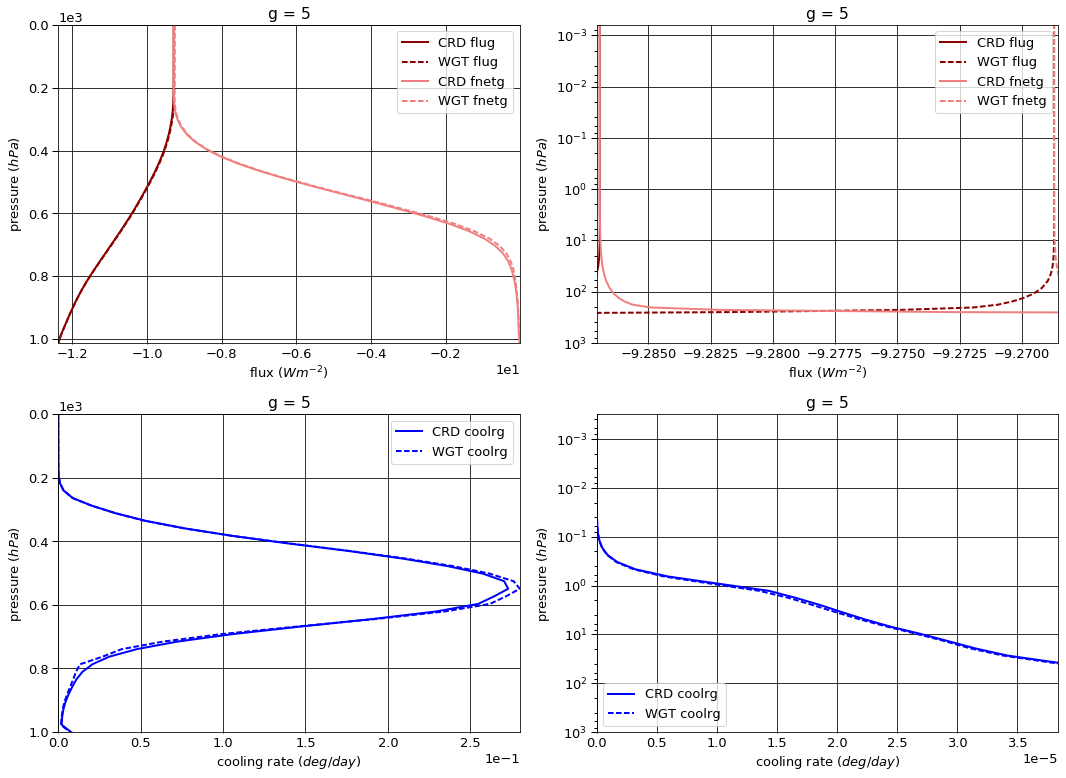

# Figure: flux, cooling rate g-group 6

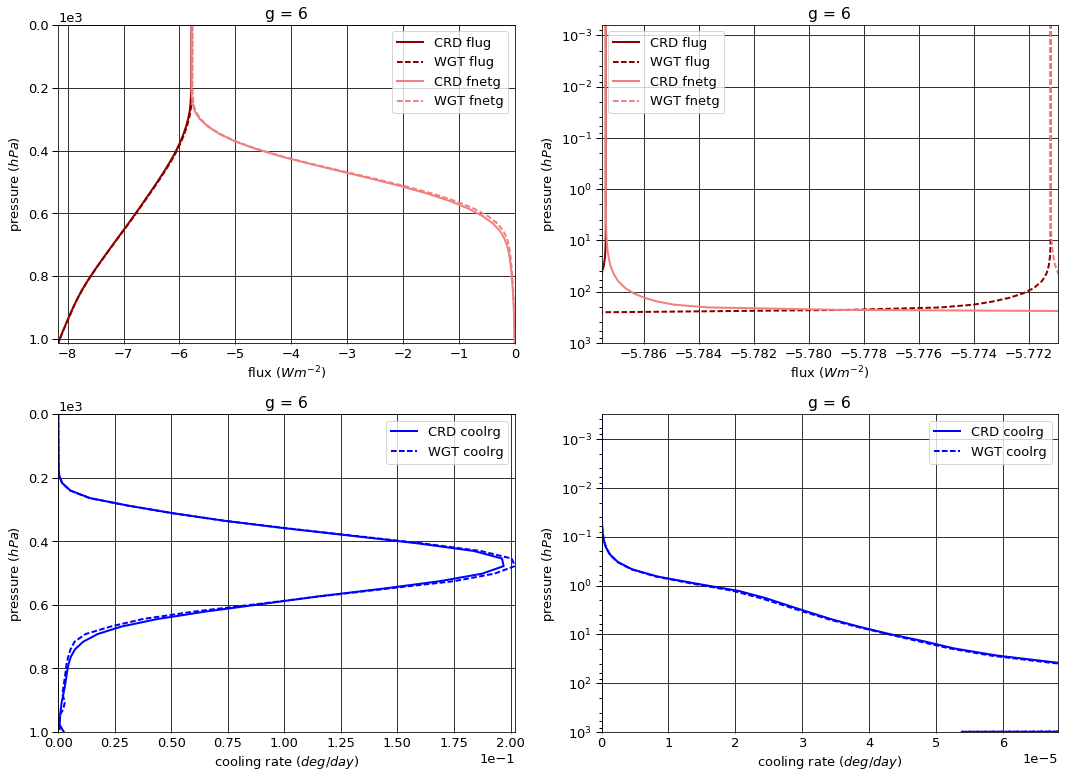

# Figure: flux, cooling rate g-group 7

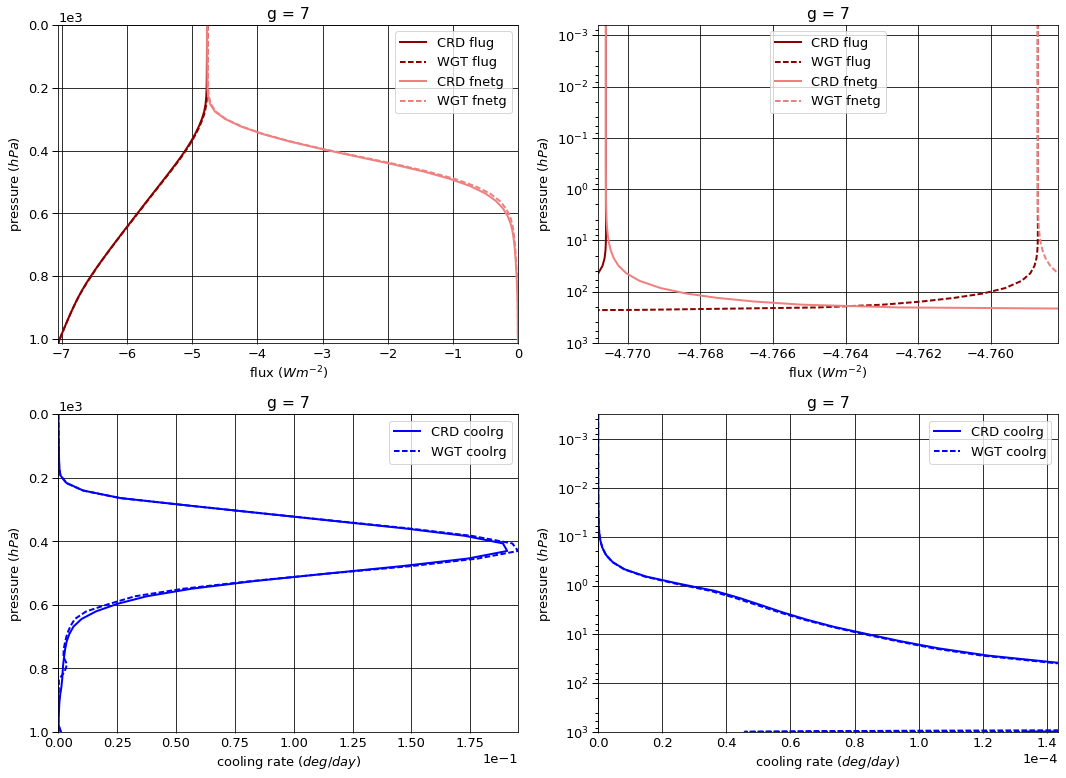

# Figure: flux, cooling rate g-group 8

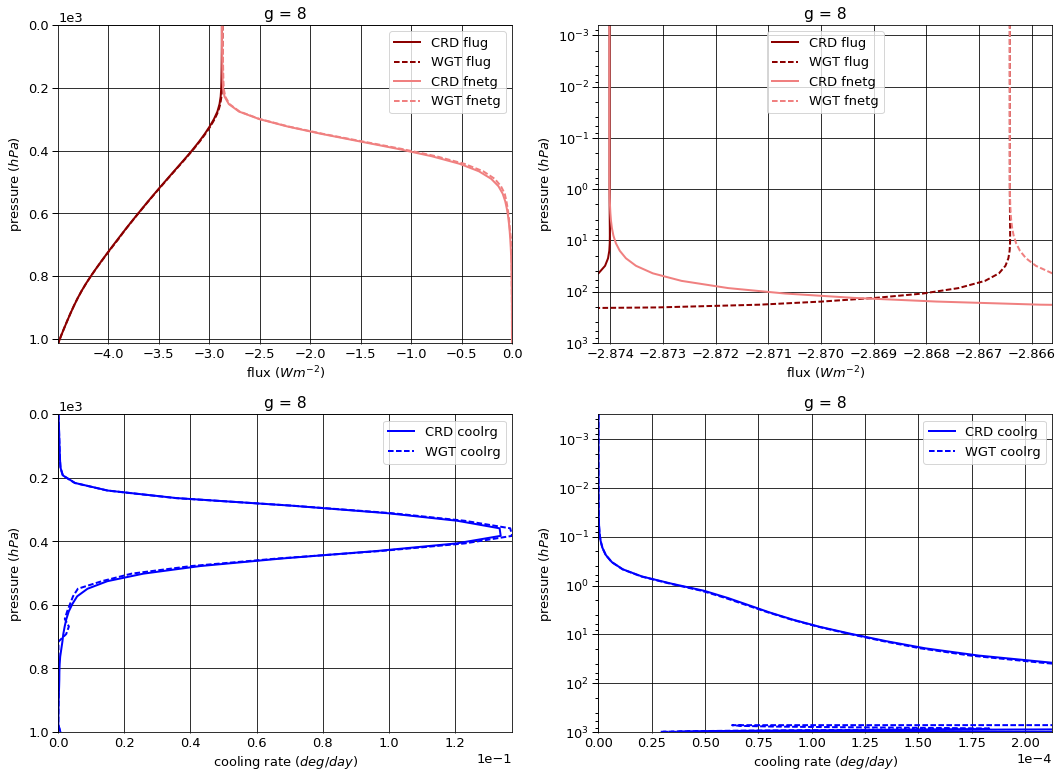

# Figure: flux, cooling rate g-group 9

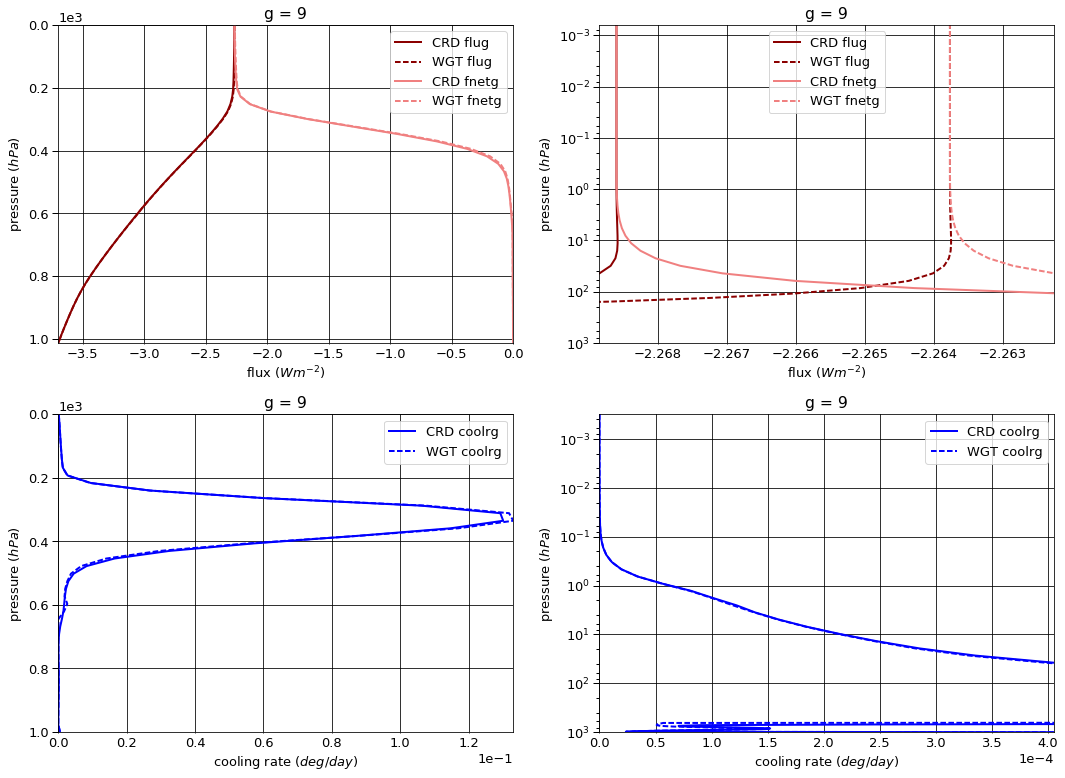

# Figure: flux, cooling rate g-group 10

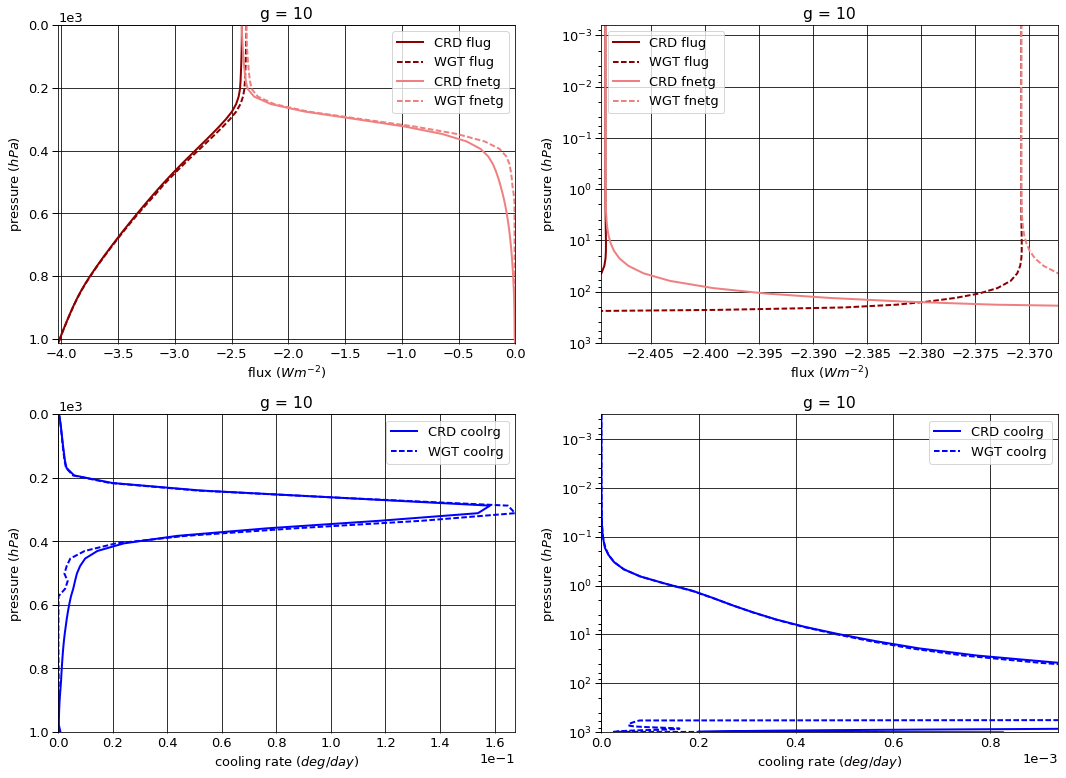

# Figure: flux, cooling rate g-group 11

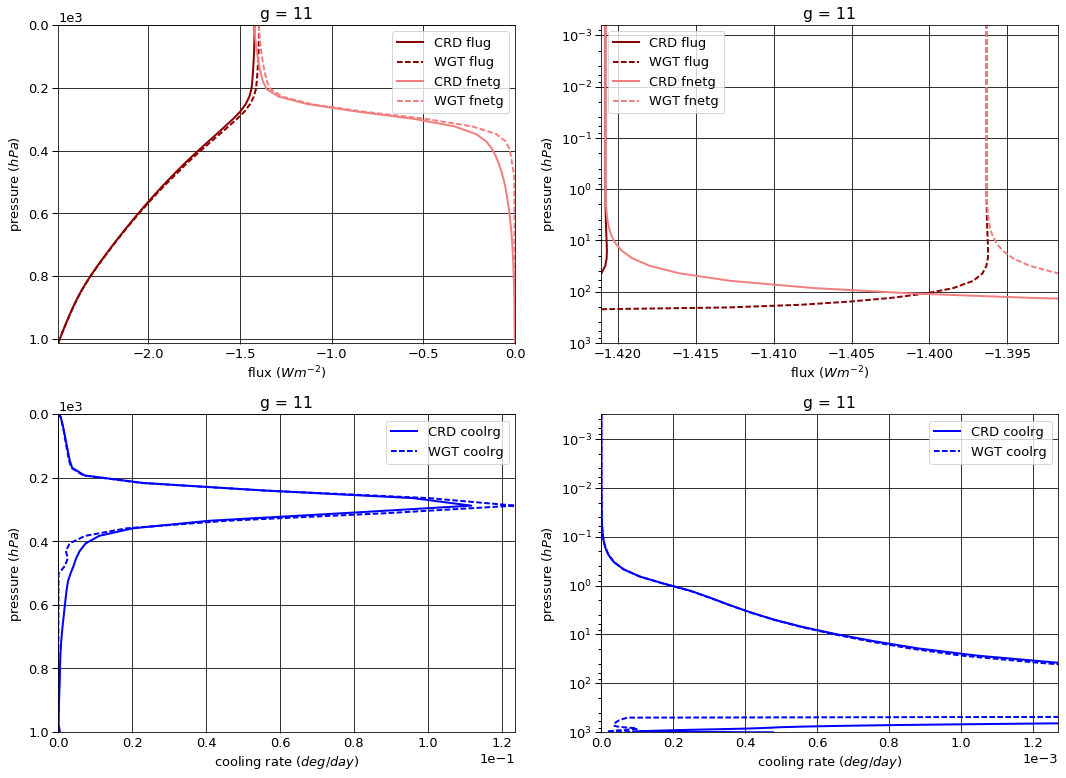

# Figure: flux, cooling rate g-group 12

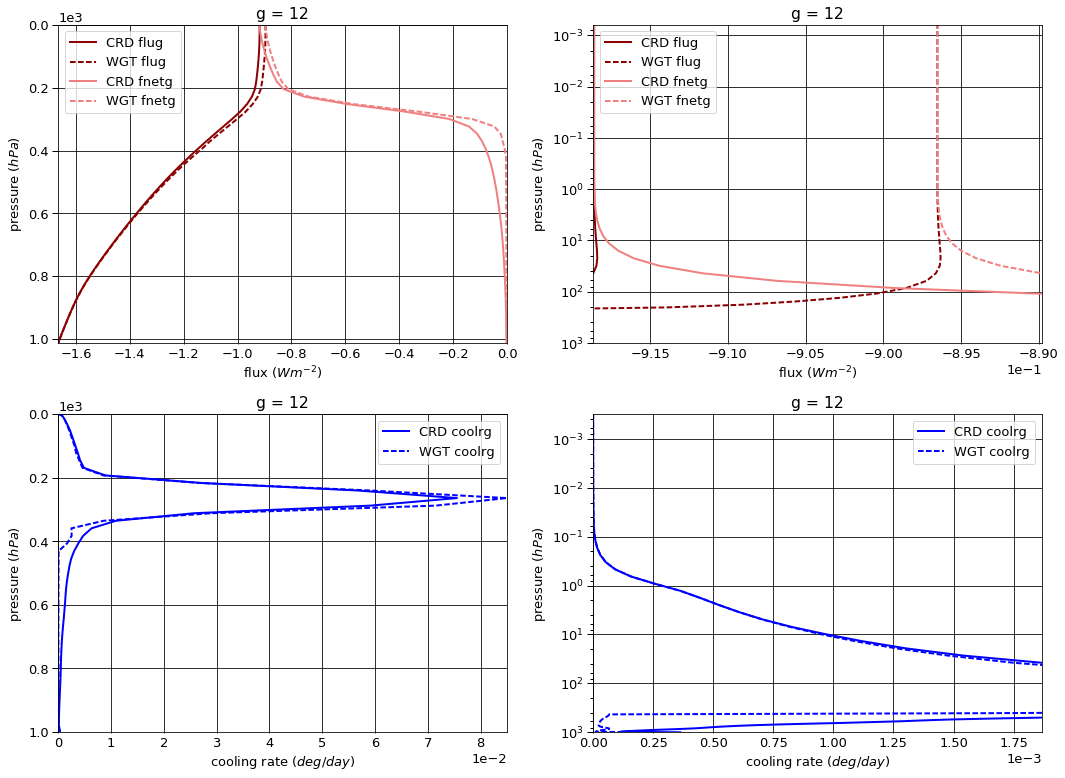

# Figure: flux, cooling rate g-group 13

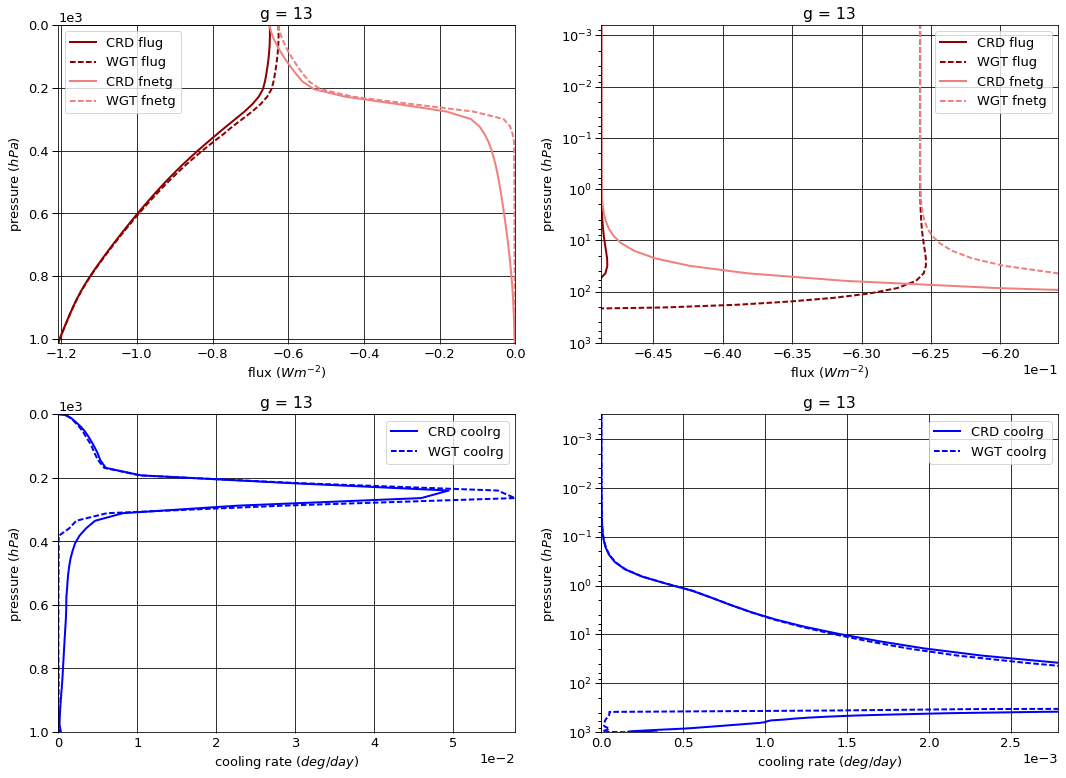

# Figure: flux, cooling rate g-group 14

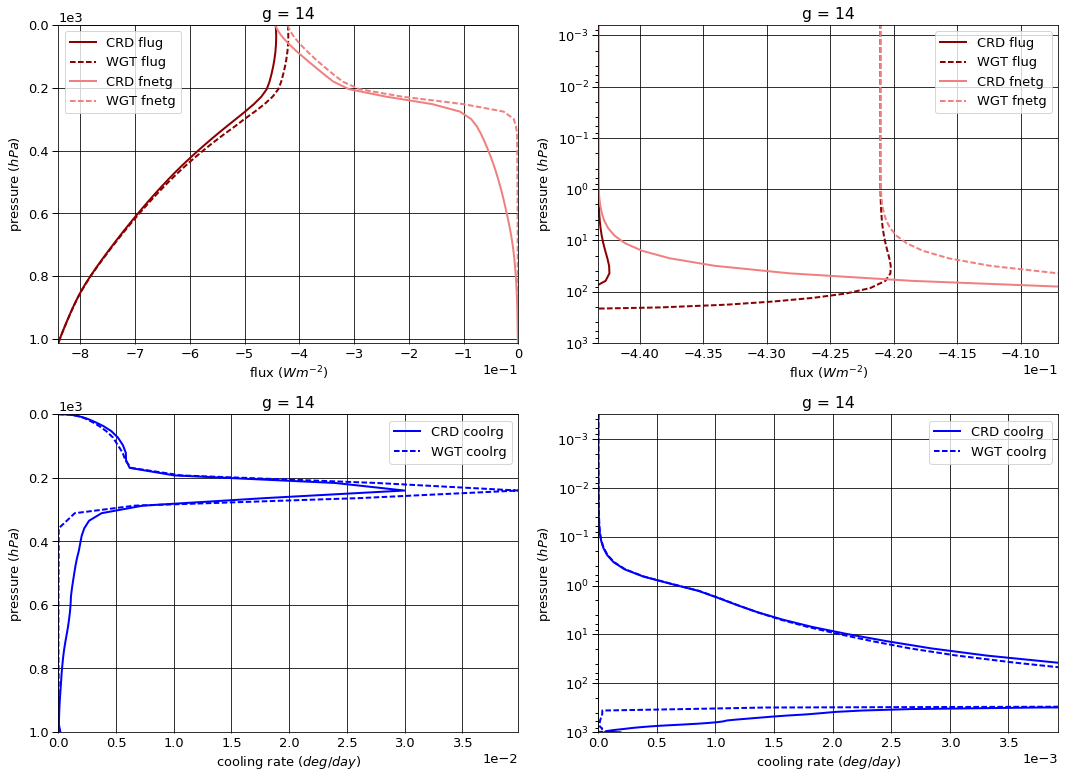

# Figure: flux, cooling rate g-group 15

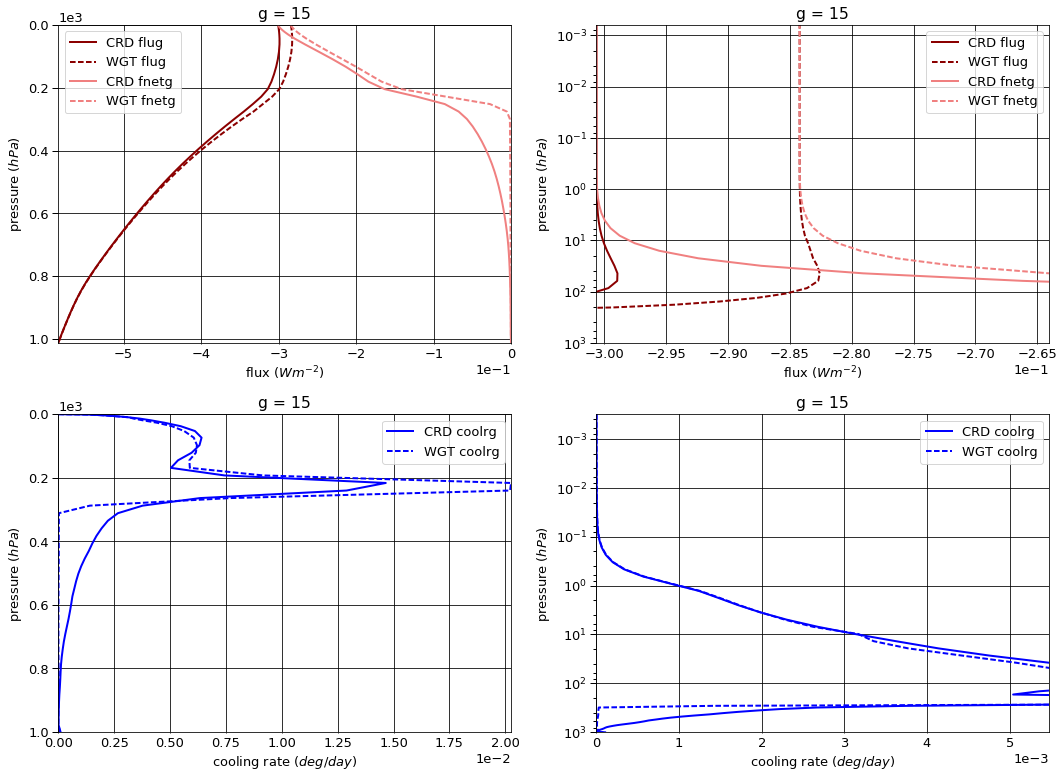

# Figure: flux, cooling rate g-group 16

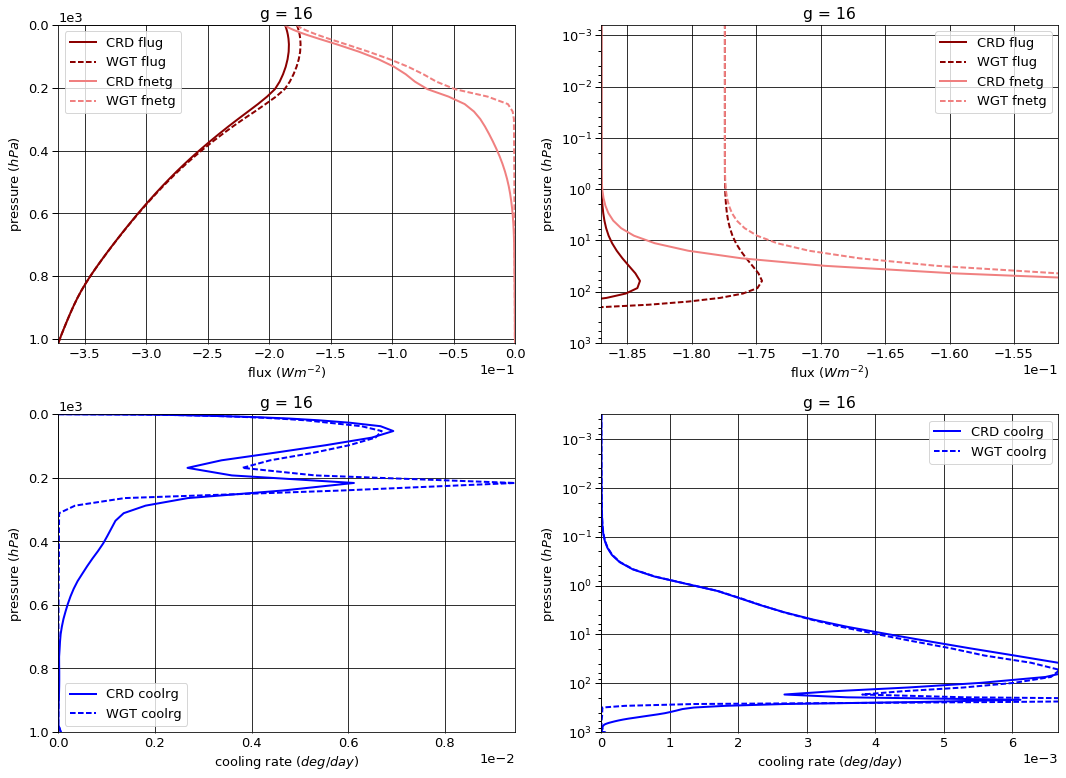

# Figure: flux, cooling rate g-group 17

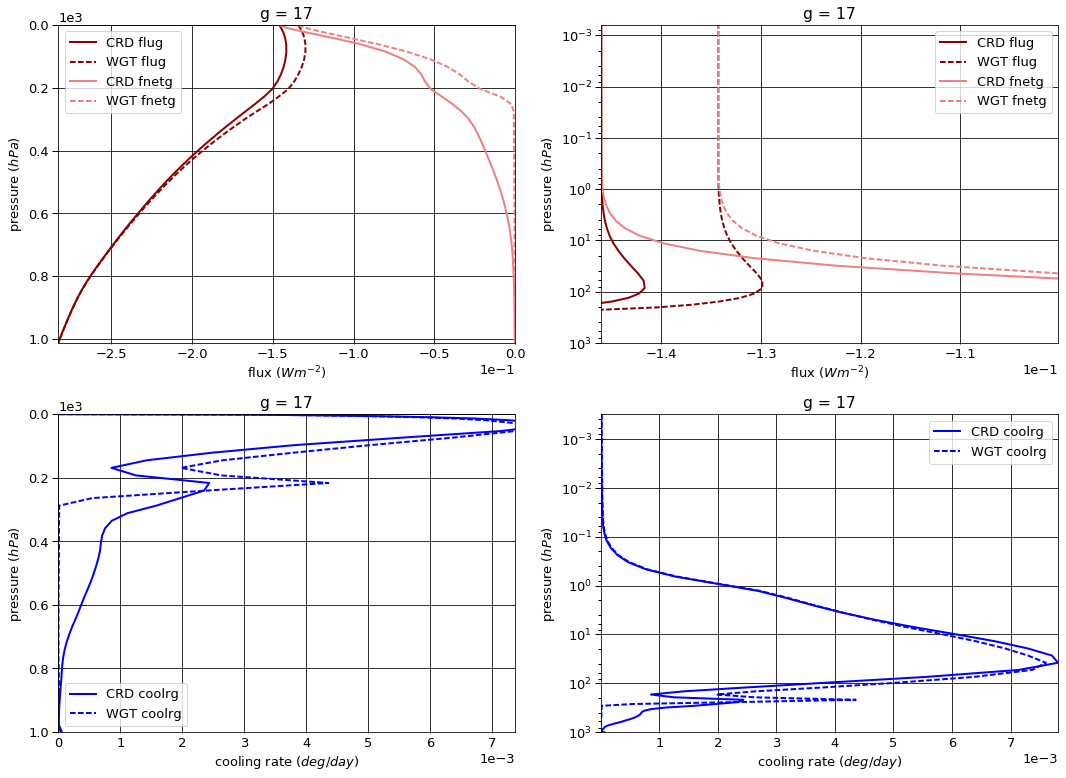

# Figure: flux, cooling rate g-group 18

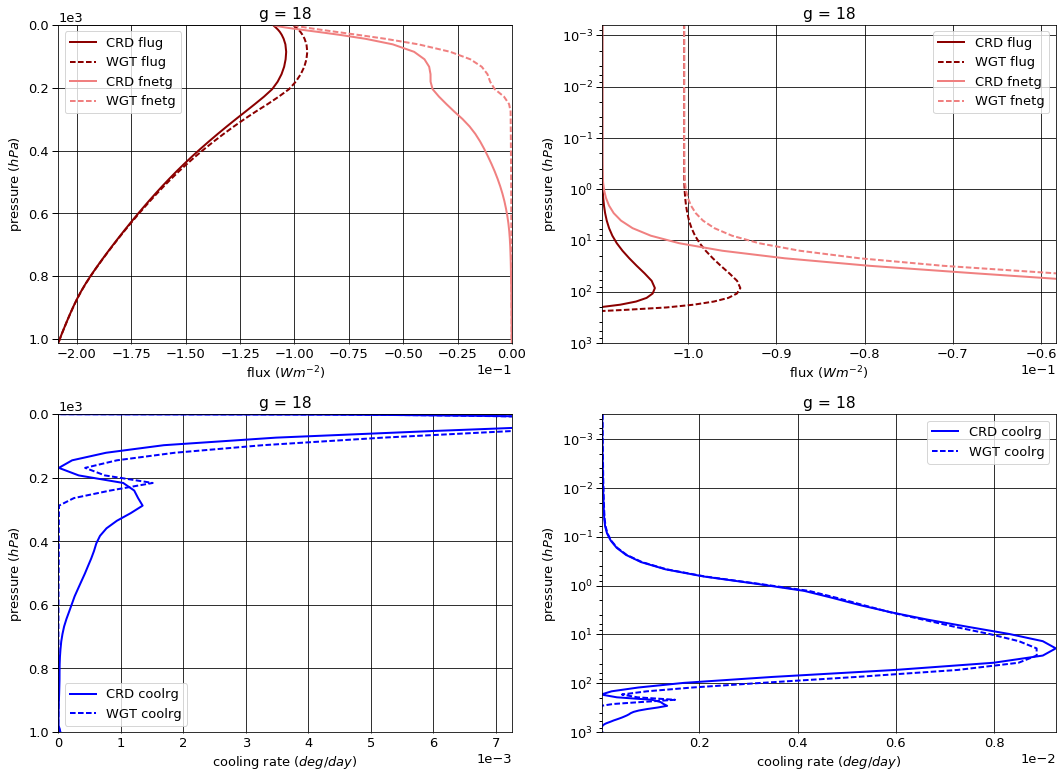

# Figure: flux, cooling rate g-group 19

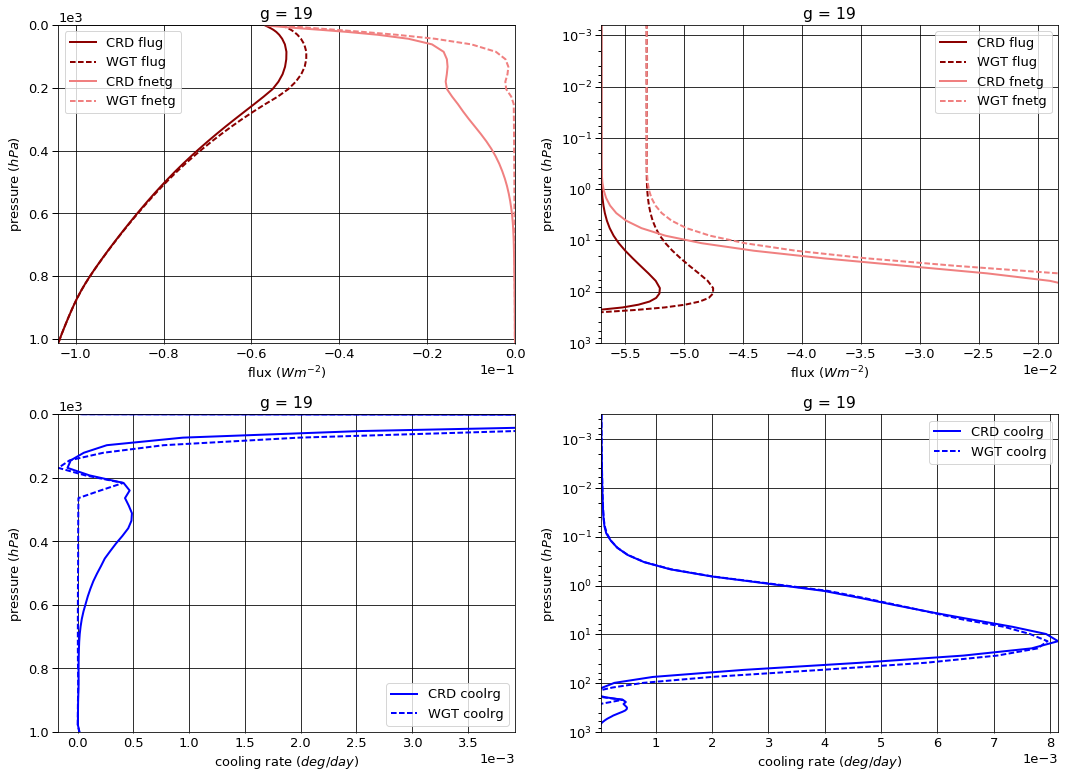

# Figure: flux, cooling rate g-group 20

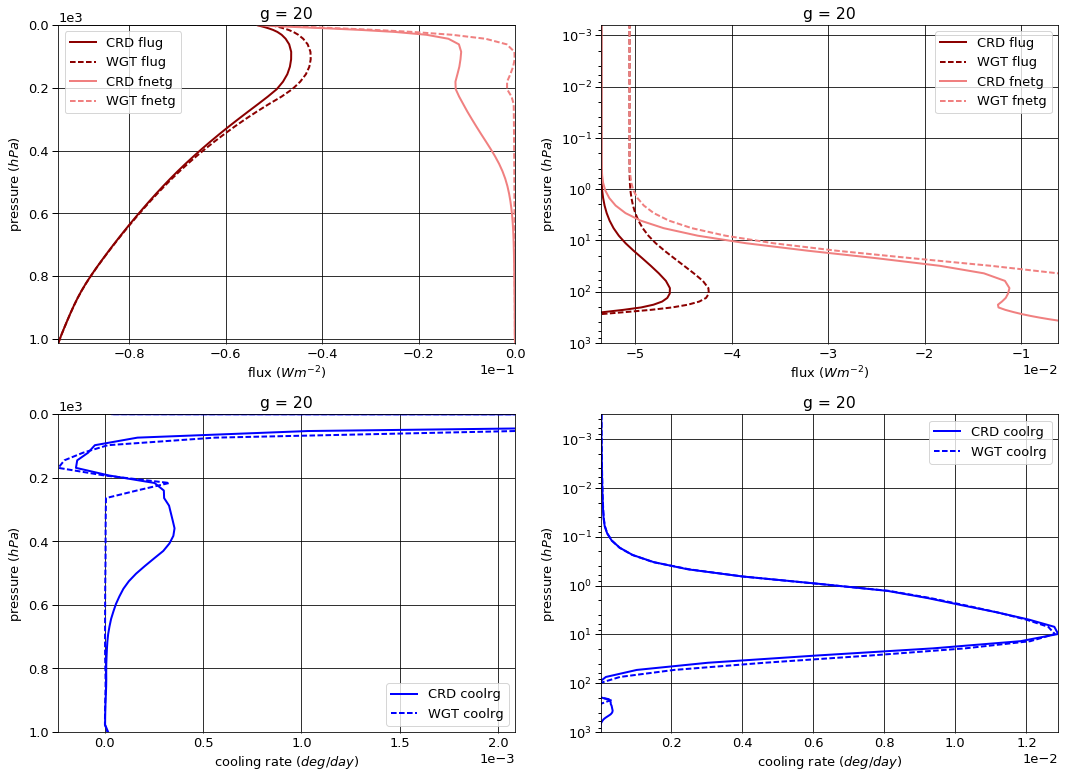

# Figure: flux, cooling rate g-group 21

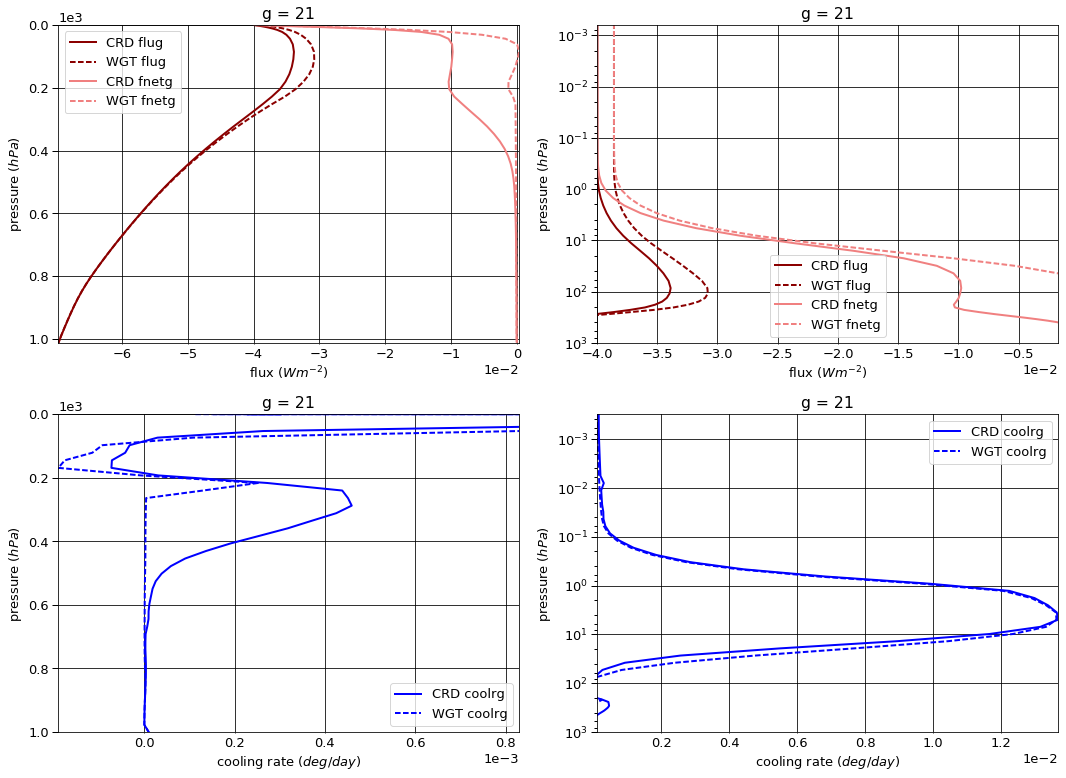

# Figure: flux, cooling rate g-group 22

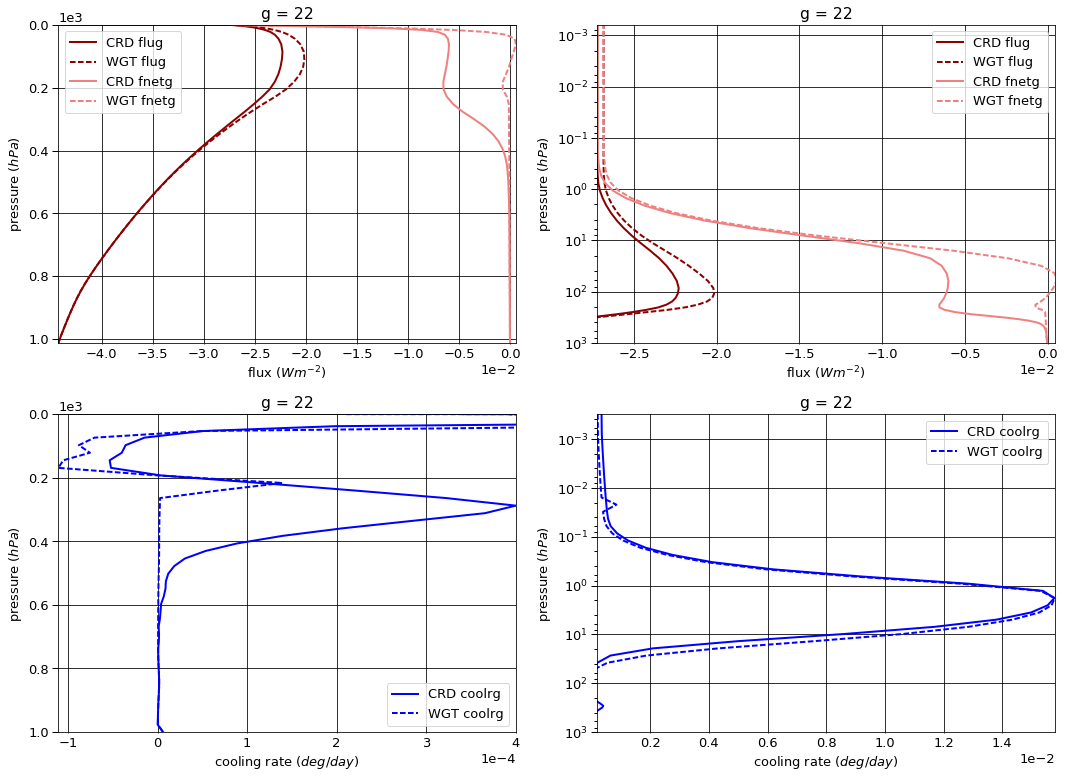

# Figure: flux, cooling rate g-group 23

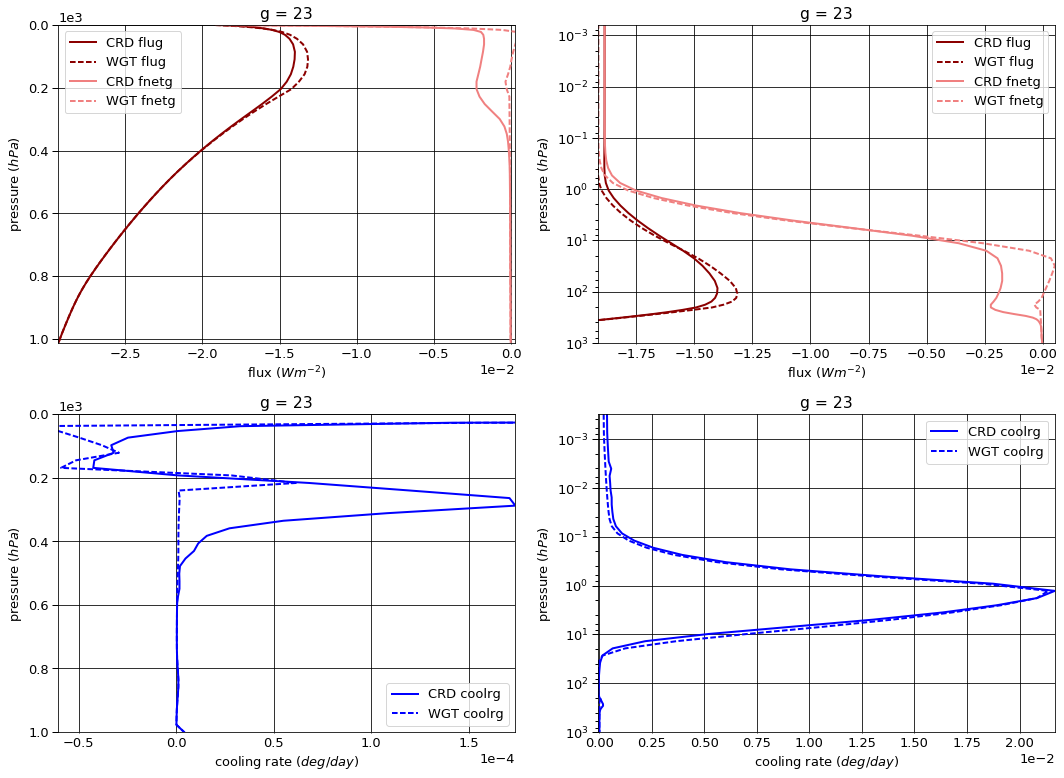

# Figure: flux, cooling rate g-group 24

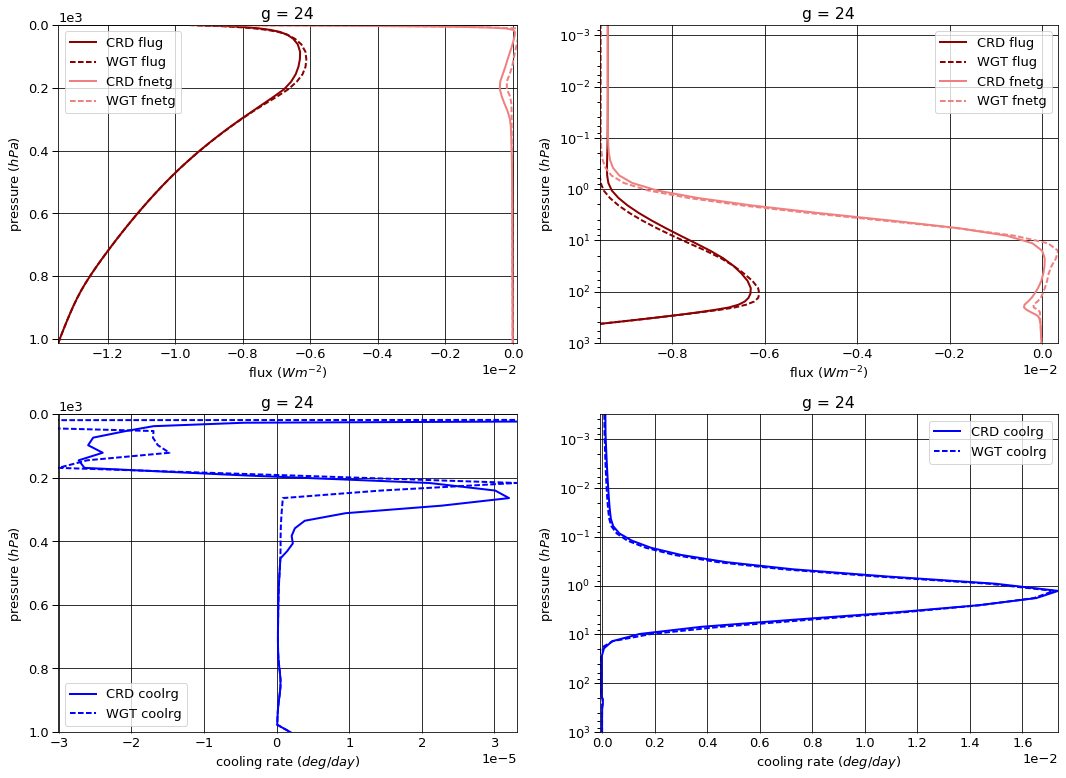

# Figure: flux, cooling rate g-group 25

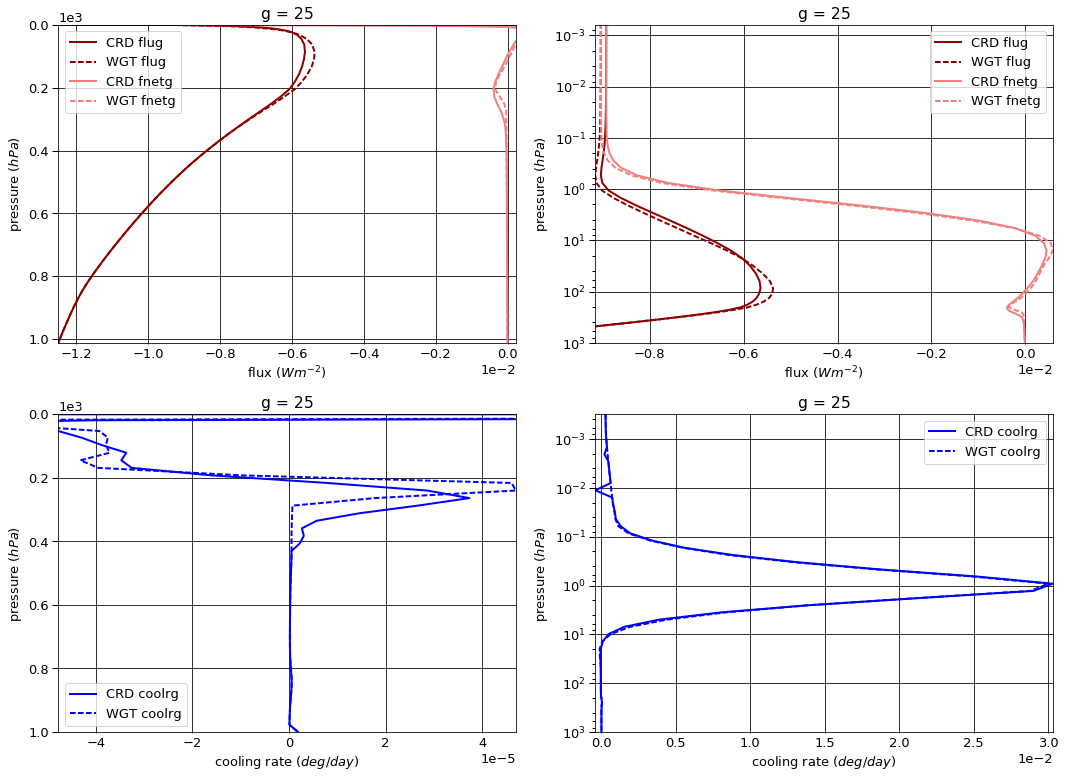

# Figure: flux, cooling rate g-group 26

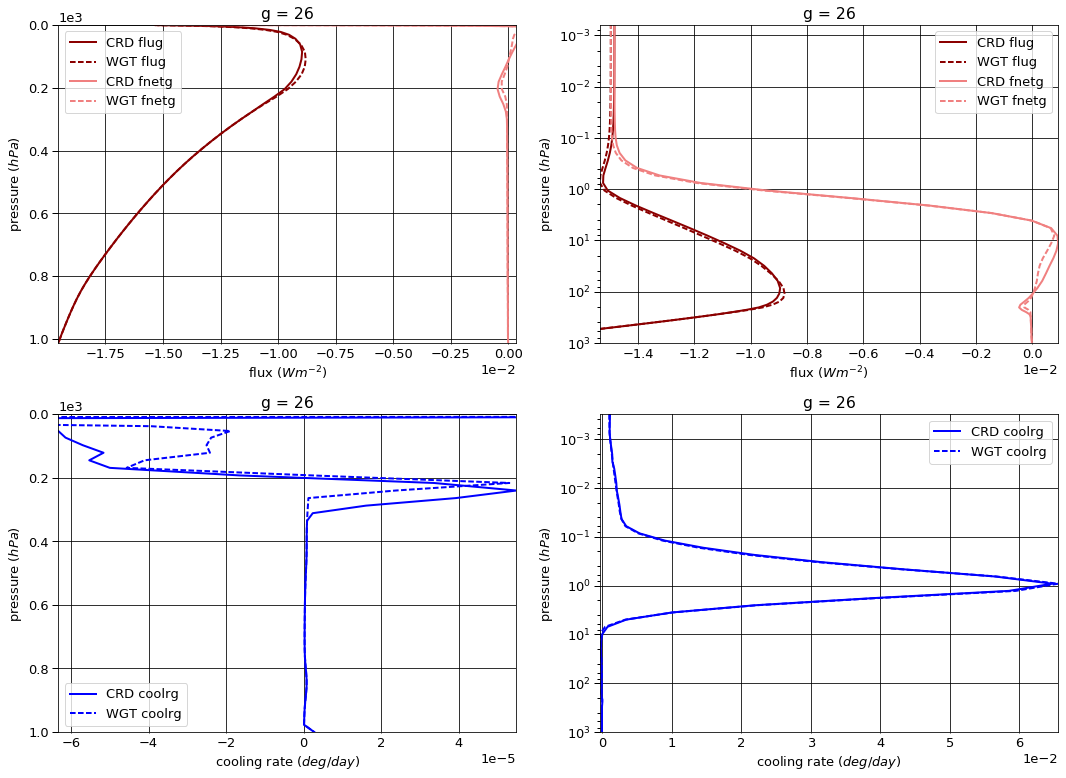

# Figure: flux, cooling rate g-group 27

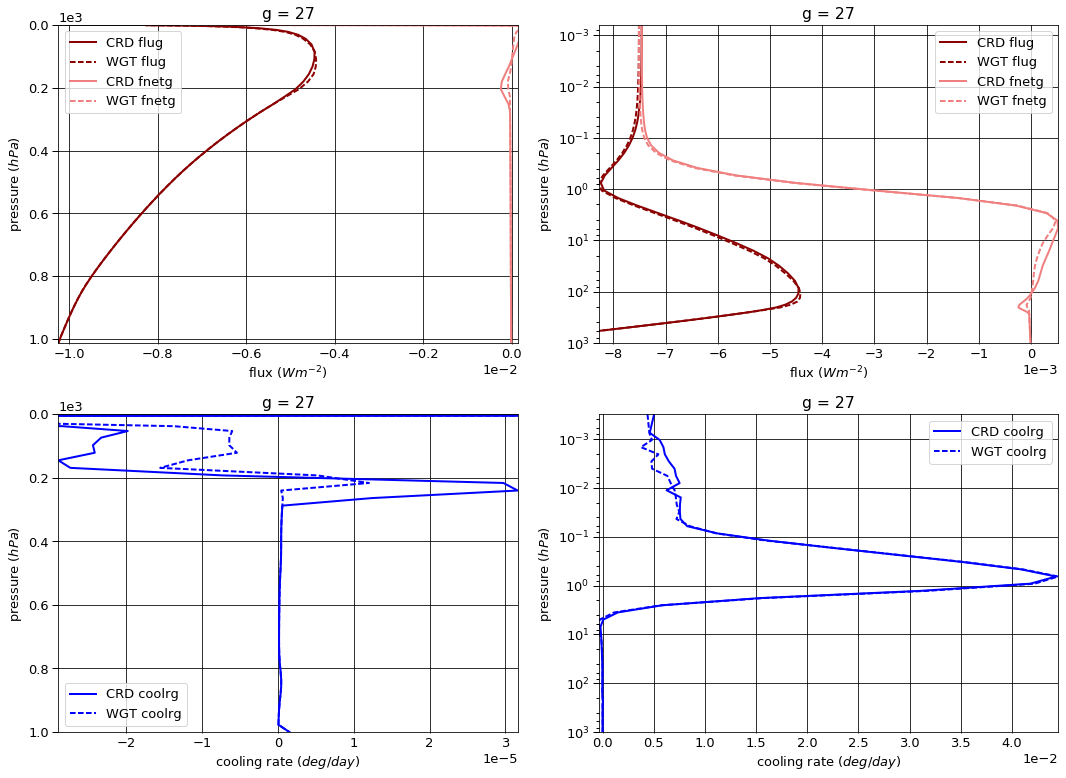

# Figure: flux, cooling rate g-group 28

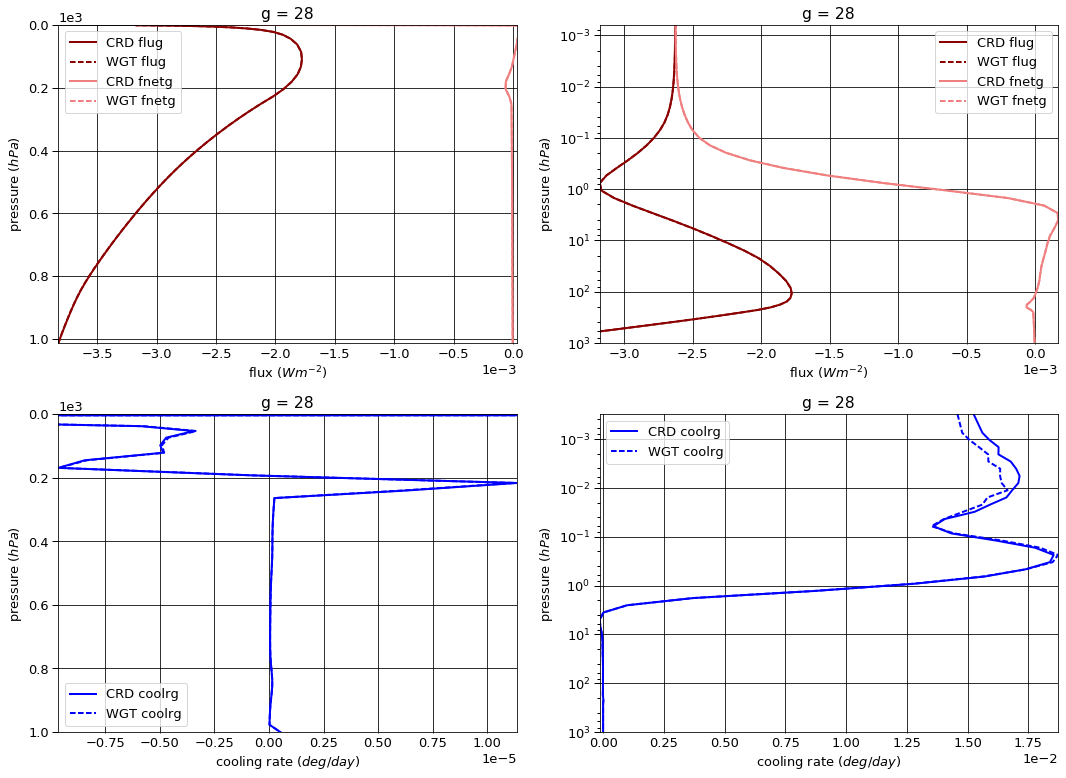

# Figure: flux, cooling rate g-group 29

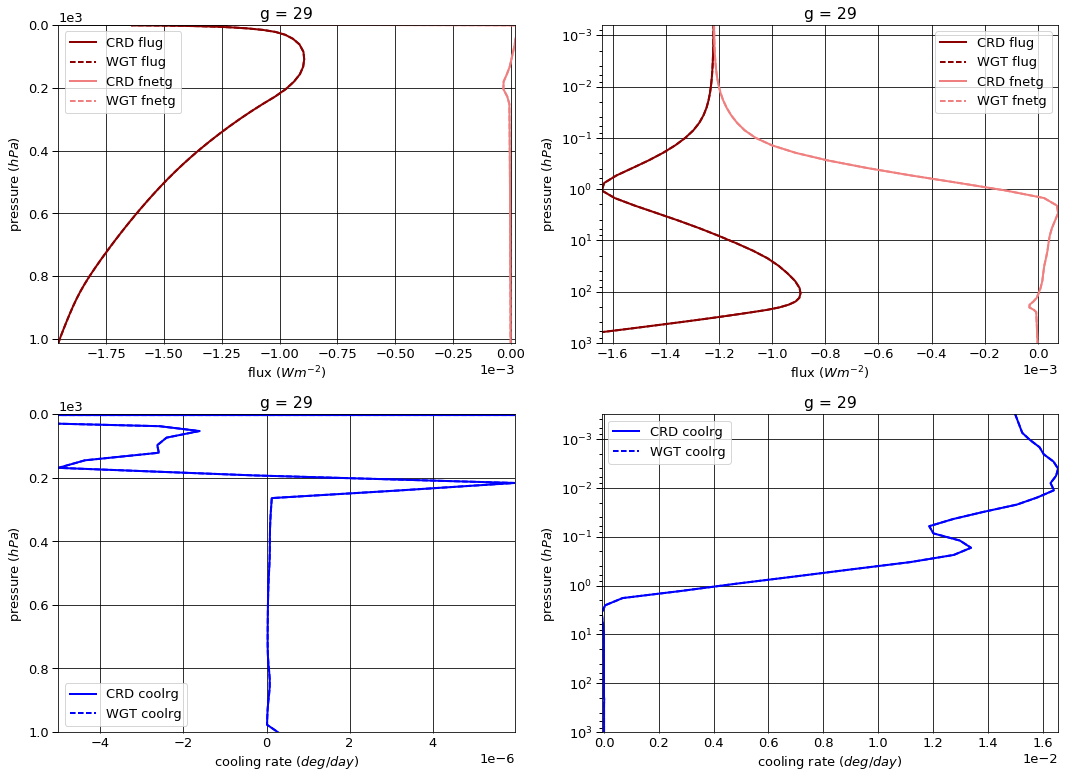

# Figure: flux, cooling rate g-group 30

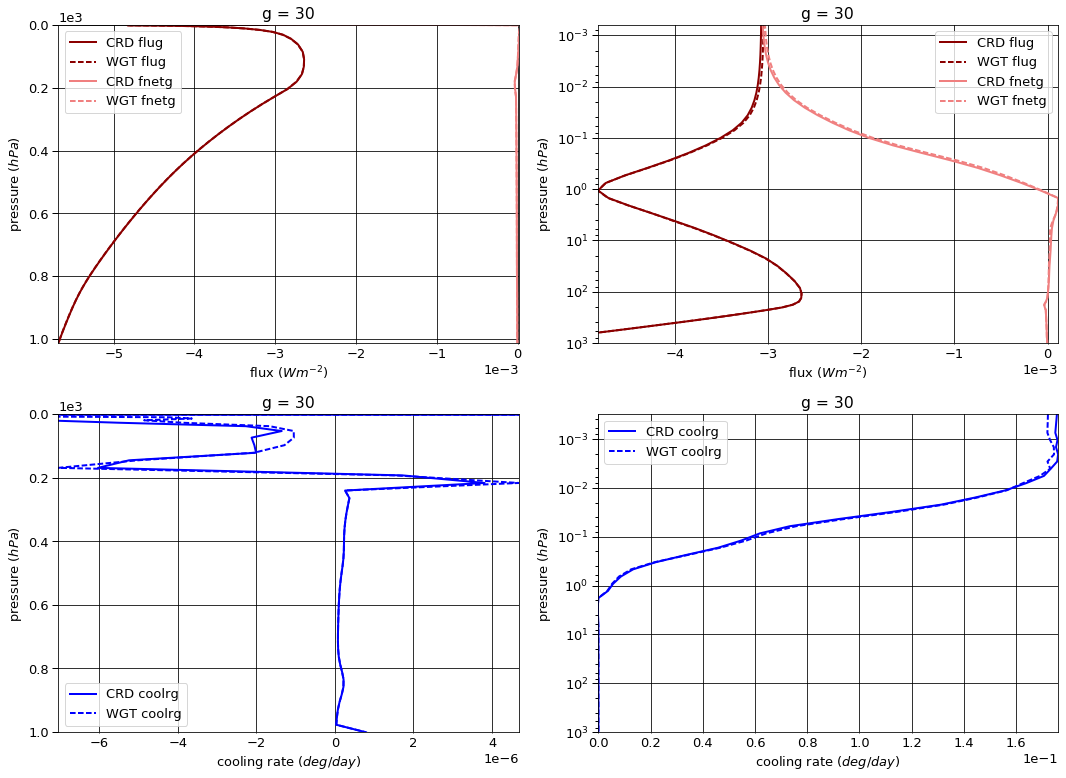

# Figure: flux, cooling rate g-group total

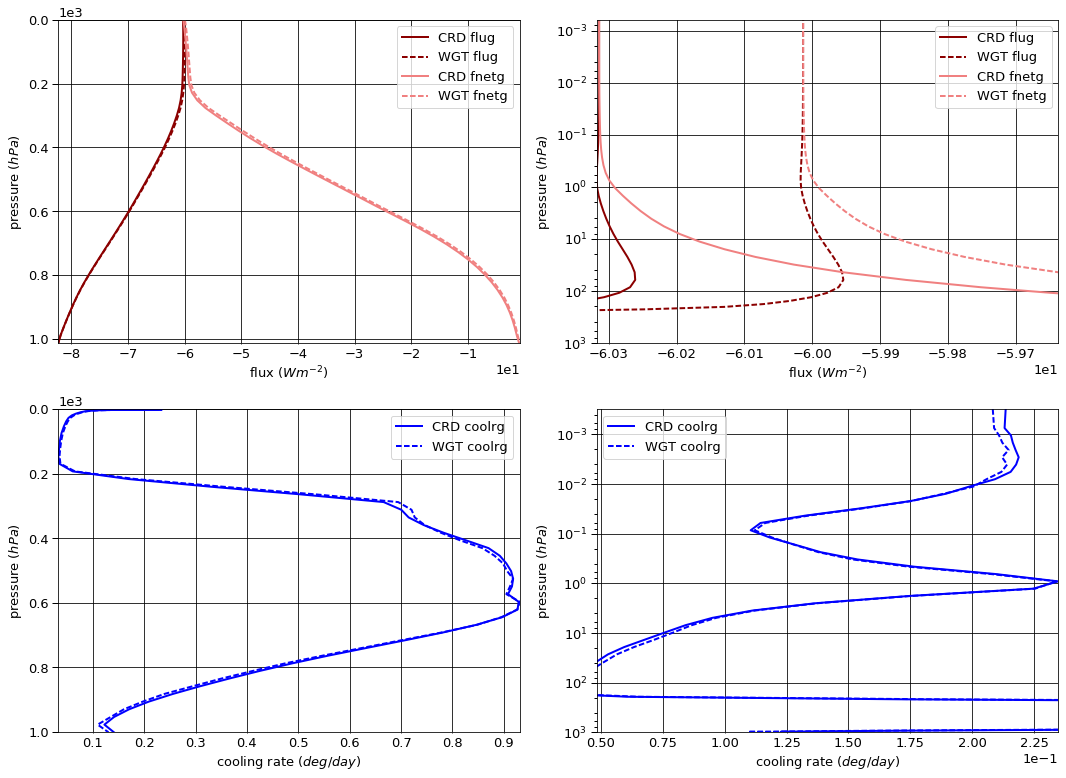

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg         fnetg
g  pressure level                                    
1  0.0      1      -3.242377   0.000000 -3.242377e+00
   1013.0   76     -3.571732   3.006878 -5.648544e-01
2  0.0      1      -5.771293   0.000000 -5.771293e+00
   1013.0   76     -6.690713   6.466348 -2.243651e-01
3  0.0      1      -9.889737   0.000000 -9.889737e+00
   1013.0   76    -11.984769  11.895176 -8.959280e-02
4  0.0      1      -9.595195   0.000000 -9.595195e+00
   1013.0   76    -12.203914  12.161857 -4.205754e-02
5  0.0      1      -9.286952   0.000000 -9.286952e+00
   1013.0   76    -12.375154  12.353993 -2.116072e-02
6  0.0      1      -5.787392   0.000000 -5.787392e+00
   1013.0   76     -8.165153   8.158590 -6.562808e-03
7  0.0      1      -4.770601   0.000000 -4.770601e+00
   1013.0   76     -7.049375   7.045995 -3.380315e-03
8  0.0      1      -2.874012   0.000000 -2.874012e+00
   1013.0   76     -4.491857   4.489966 -1.891270e-03
9  0.0      1      -2.268601   0.000000 -2.268601e+00
   1013.0   76     -3.698724   3.697242 -1.481236e-03
10 0.0      1      -2.409231   0.000000 -2.409231e+00
   1013.0   76     -4.026199   4.023702 -2.497015e-03
11 0.0      1      -1.420801   0.000000 -1.420801e+00
   1013.0   76     -2.488974   2.487552 -1.422071e-03
12 0.0      1      -0.918615   0.000000 -9.186146e-01
   1013.0   76     -1.665599   1.664330 -1.268477e-03
13 0.0      1      -0.648741   0.000000 -6.487406e-01
   1013.0   76     -1.207393   1.206012 -1.381121e-03
14 0.0      1      -0.443271   0.000000 -4.432709e-01
   1013.0   76     -0.840265   0.839652 -6.127656e-04
15 0.0      1      -0.300631   0.000000 -3.006312e-01
   1013.0   76     -0.584277   0.583976 -3.009138e-04
16 0.0      1      -0.187017   0.000000 -1.870165e-01
   1013.0   76     -0.371482   0.371327 -1.551466e-04
17 0.0      1      -0.145993   0.000000 -1.459933e-01
   1013.0   76     -0.282756   0.282578 -1.777635e-04
18 0.0      1      -0.109746   0.000000 -1.097464e-01
   1013.0   76     -0.208474   0.208375 -9.886046e-05
19 0.0      1      -0.057003   0.000000 -5.700290e-02
   1013.0   76     -0.103912   0.103867 -4.516756e-05
20 0.0      1      -0.053528   0.000000 -5.352776e-02
   1013.0   76     -0.094661   0.094613 -4.834456e-05
21 0.0      1      -0.039961   0.000000 -3.996084e-02
   1013.0   76     -0.069657   0.069628 -2.867657e-05
22 0.0      1      -0.027216   0.000000 -2.721555e-02
   1013.0   76     -0.044240   0.044222 -1.755808e-05
23 0.0      1      -0.018868   0.000000 -1.886829e-02
   1013.0   76     -0.029336   0.029324 -1.184039e-05
24 0.0      1      -0.009395   0.000000 -9.395201e-03
   1013.0   76     -0.013460   0.013455 -5.352831e-06
25 0.0      1      -0.008927   0.000000 -8.927346e-03
   1013.0   76     -0.012501   0.012495 -5.317422e-06
26 0.0      1      -0.014842   0.000000 -1.484232e-02
   1013.0   76     -0.019547   0.019539 -7.851031e-06
27 0.0      1      -0.007459   0.000000 -7.458624e-03
   1013.0   76     -0.010244   0.010240 -4.310505e-06
28 0.0      1      -0.002626   0.000000 -2.625759e-03
   1013.0   76     -0.003826   0.003825 -1.478670e-06
29 0.0      1      -0.001220   0.000000 -1.219689e-03
   1013.0   76     -0.001956   0.001955 -7.709598e-07
30 0.0      1      -0.003074   0.000000 -3.073616e-03
   1013.0   76     -0.005683   0.005681 -2.192051e-06


WGT


flug       fldg         fnetg
g  pressure level                                    
1  0.0      1      -3.238608   0.000000 -3.238608e+00
   1013.0   76     -3.571743   3.056028 -5.157145e-01
2  0.0      1      -5.763400   0.000000 -5.763400e+00
   1013.0   76     -6.690642   6.510674 -1.799685e-01
3  0.0      1      -9.868269   0.000000 -9.868269e+00
   1013.0   76    -11.984763  11.914701 -7.006197e-02
4  0.0      1      -9.571255   0.000000 -9.571255e+00
   1013.0   76    -12.203777  12.168616 -3.516048e-02
5  0.0      1      -9.268709   0.000000 -9.268709e+00
   1013.0   76    -12.375009  12.356653 -1.835661e-02
6  0.0      1      -5.771211   0.000000 -5.771211e+00
   1013.0   76     -8.165167   8.161750 -3.417266e-03
7  0.0      1      -4.758710   0.000000 -4.758710e+00
   1013.0   76     -7.049259   7.046372 -2.887795e-03
8  0.0      1      -2.866417   0.000000 -2.866417e+00
   1013.0   76     -4.492163   4.490323 -1.840641e-03
9  0.0      1      -2.263769   0.000000 -2.263769e+00
   1013.0   76     -3.698809   3.697328 -1.481274e-03
10 0.0      1      -2.370740   0.000000 -2.370740e+00
   1013.0   76     -4.026247   4.024636 -1.611010e-03
11 0.0      1      -1.396340   0.000000 -1.396340e+00
   1013.0   76     -2.488909   2.487905 -1.004132e-03
12 0.0      1      -0.896528   0.000000 -8.965278e-01
   1013.0   76     -1.665541   1.664870 -6.713359e-04
13 0.0      1      -0.625782   0.000000 -6.257820e-01
   1013.0   76     -1.207398   1.206911 -4.869836e-04
14 0.0      1      -0.421057   0.000000 -4.210571e-01
   1013.0   76     -0.840287   0.839949 -3.380670e-04
15 0.0      1      -0.284213   0.000000 -2.842129e-01
   1013.0   76     -0.584273   0.584038 -2.345273e-04
16 0.0      1      -0.177431   0.000000 -1.774310e-01
   1013.0   76     -0.371495   0.371347 -1.486668e-04
17 0.0      1      -0.134267   0.000000 -1.342674e-01
   1013.0   76     -0.282769   0.282655 -1.143476e-04
18 0.0      1      -0.100468   0.000000 -1.004679e-01
   1013.0   76     -0.208479   0.208394 -8.476460e-05
19 0.0      1      -0.053162   0.000000 -5.316220e-02
   1013.0   76     -0.103922   0.103880 -4.123528e-05
20 0.0      1      -0.050608   0.000000 -5.060800e-02
   1013.0   76     -0.094667   0.094629 -3.839391e-05
21 0.0      1      -0.038582   0.000000 -3.858183e-02
   1013.0   76     -0.069669   0.069641 -2.868792e-05
22 0.0      1      -0.026841   0.000000 -2.684063e-02
   1013.0   76     -0.044242   0.044224 -1.755892e-05
23 0.0      1      -0.019145   0.000000 -1.914501e-02
   1013.0   76     -0.029341   0.029329 -1.184446e-05
24 0.0      1      -0.009550   0.000000 -9.549550e-03
   1013.0   76     -0.013459   0.013454 -5.353152e-06
25 0.0      1      -0.009043   0.000000 -9.042816e-03
   1013.0   76     -0.012501   0.012496 -5.318175e-06
26 0.0      1      -0.014970   0.000000 -1.497022e-02
   1013.0   76     -0.019547   0.019540 -7.852130e-06
27 0.0      1      -0.007511   0.000000 -7.511173e-03
   1013.0   76     -0.010246   0.010241 -4.311214e-06
28 0.0      1      -0.002625   0.000000 -2.624505e-03
   1013.0   76     -0.003827   0.003826 -1.479610e-06
29 0.0      1      -0.001220   0.000000 -1.219604e-03
   1013.0   76     -0.001956   0.001955 -7.707752e-07
30 0.0      1      -0.003048   0.000000 -3.048361e-03
   1013.0   76     -0.005685   0.005683 -2.193779e-06


WGT - CRD


flug          fldg         fnetg
g  pressure level                                          
1  0.0      1      3.768700e-03  0.000000e+00  3.768700e-03
   1013.0   76    -1.020000e-05  4.915030e-02  4.913998e-02
2  0.0      1      7.893800e-03  0.000000e+00  7.893800e-03
   1013.0   76     7.040000e-05  4.432610e-02  4.439653e-02
3  0.0      1      2.146810e-02  0.000000e+00  2.146810e-02
   1013.0   76     6.000000e-06  1.952500e-02  1.953083e-02
4  0.0      1      2.394000e-02  0.000000e+00  2.394000e-02
   1013.0   76     1.370000e-04  6.759000e-03  6.897065e-03
5  0.0      1      1.824290e-02  0.000000e+00  1.824290e-02
   1013.0   76     1.450000e-04  2.660000e-03  2.804110e-03
6  0.0      1      1.618040e-02  0.000000e+00  1.618040e-02
   1013.0   76    -1.450000e-05  3.160000e-03  3.145542e-03
7  0.0      1      1.189120e-02  0.000000e+00  1.189120e-02
   1013.0   76     1.154000e-04  3.771000e-04  4.925196e-04
8  0.0      1      7.594700e-03  0.000000e+00  7.594700e-03
   1013.0   76    -3.065000e-04  3.571000e-04  5.062870e-05
9  0.0      1      4.831700e-03  0.000000e+00  4.831700e-03
   1013.0   76    -8.520000e-05  8.510000e-05 -3.810000e-08
10 0.0      1      3.849110e-02  0.000000e+00  3.849110e-02
   1013.0   76    -4.860000e-05  9.346000e-04  8.860053e-04
11 0.0      1      2.446150e-02  0.000000e+00  2.446150e-02
   1013.0   76     6.510000e-05  3.528000e-04  4.179388e-04
12 0.0      1      2.208675e-02  0.000000e+00  2.208675e-02
   1013.0   76     5.780000e-05  5.393000e-04  5.971414e-04
13 0.0      1      2.295855e-02  0.000000e+00  2.295855e-02
   1013.0   76    -4.800000e-06  8.989000e-04  8.941379e-04
14 0.0      1      2.221377e-02  0.000000e+00  2.221377e-02
   1013.0   76    -2.208000e-05  2.967700e-04  2.746986e-04
15 0.0      1      1.641829e-02  0.000000e+00  1.641829e-02
   1013.0   76     4.000000e-06  6.239000e-05  6.638650e-05
16 0.0      1      9.585540e-03  0.000000e+00  9.585540e-03
   1013.0   76    -1.351000e-05  1.999000e-05  6.479790e-06
17 0.0      1      1.172589e-02  0.000000e+00  1.172589e-02
   1013.0   76    -1.320000e-05  7.662000e-05  6.341594e-05
18 0.0      1      9.278510e-03  0.000000e+00  9.278510e-03
   1013.0   76    -5.490000e-06  1.958000e-05  1.409586e-05
19 0.0      1      3.840701e-03  0.000000e+00  3.840701e-03
   1013.0   76    -9.520000e-06  1.345000e-05  3.932279e-06
20 0.0      1      2.919757e-03  0.000000e+00  2.919757e-03
   1013.0   76    -5.843000e-06  1.579300e-05  9.950654e-06
21 0.0      1      1.379014e-03  0.000000e+00  1.379014e-03
   1013.0   76    -1.275700e-05  1.274600e-05 -1.135500e-08
22 0.0      1      3.749170e-04  0.000000e+00  3.749170e-04
   1013.0   76    -1.905000e-06  1.904000e-06 -8.380000e-10
23 0.0      1     -2.767190e-04  0.000000e+00 -2.767190e-04
   1013.0   76    -5.582000e-06  5.577000e-06 -4.068000e-09
24 0.0      1     -1.543493e-04  0.000000e+00 -1.543493e-04
   1013.0   76     3.740000e-07 -3.740000e-07 -3.203000e-10
25 0.0      1     -1.154699e-04  0.000000e+00 -1.154699e-04
   1013.0   76    -7.940000e-07  7.930000e-07 -7.520000e-10
26 0.0      1     -1.279010e-04  0.000000e+00 -1.279010e-04
   1013.0   76    -8.360000e-07  8.360000e-07 -1.099200e-09
27 0.0      1     -5.254920e-05  0.000000e+00 -5.254920e-05
   1013.0   76    -1.360000e-06  1.360000e-06 -7.086000e-10
28 0.0      1      1.253800e-06  0.000000e+00  1.253800e-06
   1013.0   76    -1.317700e-06  1.316800e-06 -9.398000e-10
29 0.0      1      8.510000e-08  0.000000e+00  8.510000e-08
   1013.0   76     2.446000e-07 -2.445000e-07  1.846600e-10
30 0.0      1      2.525440e-05  0.000000e+00  2.525440e-05
   1013.0   76    -2.214500e-06  2.212800e-06 -1.727700e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.332905e-09
   1001.112500 75     4.821412e-02
2  0.000312    1     -4.298918e-09
   1001.112500 75     3.923334e-02
3  0.000312    1     -4.322935e-09
   1001.112500 75     2.437221e-02
4  0.000312    1      2.401630e-11
   1001.112500 75     1.390291e-02
5  0.000312    1      1.945321e-09
   1001.112500 75     7.989722e-03
6  0.000312    1      1.308888e-09
   1001.112500 75     2.574440e-03
7  0.000312    1      2.329581e-09
   1001.112500 75     1.239281e-03
8  0.000312    1      1.002681e-09
   1001.112500 75     6.848274e-04
9  0.000312    1      2.341590e-09
   1001.112500 75     5.350930e-04
10 0.000312    1      1.841450e-08
   1001.112500 75     8.260859e-04
11 0.000312    1      8.805878e-08
   1001.112500 75     4.780868e-04
12 0.000312    1      1.102438e-07
   1001.112500 75     3.632101e-04
13 0.000312    1      4.051070e-07
   1001.112500 75     3.380031e-04
14 0.000312    1      7.748815e-07
   1001.112500 75     1.899415e-04
15 0.000312    1      2.109025e-06
   1001.112500 75     1.065793e-04
16 0.000312    1      3.310533e-06
   1001.112500 75     5.636576e-05
17 0.000312    1      1.027686e-05
   1001.112500 75     6.117969e-05
18 0.000312    1      3.176638e-05
   1001.112500 75     3.577945e-05
19 0.000312    1      3.149893e-05
   1001.112500 75     1.638229e-05
20 0.000312    1      3.784376e-05
   1001.112500 75     1.757757e-05
21 0.000312    1      1.543456e-04
   1001.112500 75     1.035804e-05
22 0.000312    1      3.419933e-04
   1001.112500 75     6.343081e-06
23 0.000312    1      3.623646e-04
   1001.112500 75     4.277176e-06
24 0.000312    1      1.256541e-04
   1001.112500 75     1.933744e-06
25 0.000312    1      2.729954e-04
   1001.112500 75     1.920443e-06
26 0.000312    1      1.160026e-03
   1001.112500 75     2.836152e-06
27 0.000312    1      5.037201e-03
   1001.112500 75     1.556847e-06
28 0.000312    1      1.524822e-02
   1001.112500 75     5.342725e-07
29 0.000312    1      1.500111e-02
   1001.112500 75     2.785405e-07
30 0.000312    1      1.756868e-01
   1001.112500 75     7.920275e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -9.066155e-10
   1001.112500 75     4.900772e-02
2  0.000312    1     -2.809907e-09
   1001.112500 75     3.625938e-02
3  0.000312    1     -2.041386e-09
   1001.112500 75     2.040288e-02
4  0.000312    1      1.440978e-10
   1001.112500 75     1.267105e-02
5  0.000312    1      1.801223e-09
   1001.112500 75     7.137715e-03
6  0.000312    1      1.681141e-09
   1001.112500 75     1.234243e-03
7  0.000312    1      1.909296e-09
   1001.112500 75     1.043100e-03
8  0.000312    1      9.246277e-10
   1001.112500 75     6.648596e-04
9  0.000312    1      2.143455e-09
   1001.112500 75     5.351068e-04
10 0.000312    1      9.089570e-08
   1001.112500 75     5.819791e-04
11 0.000312    1      2.098875e-07
   1001.112500 75     3.627313e-04
12 0.000312    1      3.343099e-07
   1001.112500 75     2.425127e-04
13 0.000312    1      7.005045e-07
   1001.112500 75     1.759167e-04
14 0.000312    1      2.356624e-06
   1001.112500 75     1.221241e-04
15 0.000312    1      3.051778e-06
   1001.112500 75     8.472184e-05
16 0.000312    1      3.824099e-06
   1001.112500 75     5.370606e-05
17 0.000312    1      1.681704e-05
   1001.112500 75     4.130625e-05
18 0.000312    1      3.869116e-05
   1001.112500 75     3.061887e-05
19 0.000312    1      3.443061e-05
   1001.112500 75     1.489679e-05
20 0.000312    1      4.334581e-05
   1001.112500 75     1.386905e-05
21 0.000312    1      1.134481e-04
   1001.112500 75     1.036213e-05
22 0.000312    1      2.106154e-04
   1001.112500 75     6.343384e-06
23 0.000312    1      2.036125e-04
   1001.112500 75     4.278643e-06
24 0.000312    1      8.753183e-05
   1001.112500 75     1.933858e-06
25 0.000312    1      2.787236e-04
   1001.112500 75     1.920714e-06
26 0.000312    1      1.042047e-03
   1001.112500 75     2.836547e-06
27 0.000312    1      4.391443e-03
   1001.112500 75     1.557103e-06
28 0.000312    1      1.458326e-02
   1001.112500 75     5.346114e-07
29 0.000312    1      1.500248e-02
   1001.112500 75     2.784739e-07
30 0.000312    1      1.722435e-01
   1001.112500 75     7.926504e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      4.262894e-10
   1001.112500 75     7.935990e-04
2  0.000312    1      1.489011e-09
   1001.112500 75    -2.973965e-03
3  0.000312    1      2.281549e-09
   1001.112500 75    -3.969328e-03
4  0.000312    1      1.200815e-10
   1001.112500 75    -1.231863e-03
5  0.000312    1     -1.440978e-10
   1001.112500 75    -8.520073e-04
6  0.000312    1      3.722527e-10
   1001.112500 75    -1.340197e-03
7  0.000312    1     -4.202853e-10
   1001.112500 75    -1.961815e-04
8  0.000312    1     -7.805302e-11
   1001.112500 75    -1.996776e-05
9  0.000312    1     -1.981345e-10
   1001.112500 75     1.379000e-08
10 0.000312    1      7.248120e-08
   1001.112500 75    -2.441067e-04
11 0.000312    1      1.218287e-07
   1001.112500 75    -1.153555e-04
12 0.000312    1      2.240661e-07
   1001.112500 75    -1.206974e-04
13 0.000312    1      2.953975e-07
   1001.112500 75    -1.620863e-04
14 0.000312    1      1.581742e-06
   1001.112500 75    -6.781739e-05
15 0.000312    1      9.427532e-07
   1001.112500 75    -2.185751e-05
16 0.000312    1      5.135661e-07
   1001.112500 75    -2.659703e-06
17 0.000312    1      6.540189e-06
   1001.112500 75    -1.987344e-05
18 0.000312    1      6.924781e-06
   1001.112500 75    -5.160571e-06
19 0.000312    1      2.931681e-06
   1001.112500 75    -1.485499e-06
20 0.000312    1      5.502049e-06
   1001.112500 75    -3.708524e-06
21 0.000312    1     -4.089755e-05
   1001.112500 75     4.091000e-09
22 0.000312    1     -1.313779e-04
   1001.112500 75     3.033000e-10
23 0.000312    1     -1.587521e-04
   1001.112500 75     1.466900e-09
24 0.000312    1     -3.812227e-05
   1001.112500 75     1.145000e-10
25 0.000312    1      5.728250e-06
   1001.112500 75     2.710000e-10
26 0.000312    1     -1.179788e-04
   1001.112500 75     3.954000e-10
27 0.000312    1     -6.457581e-04
   1001.112500 75     2.559000e-10
28 0.000312    1     -6.649590e-04
   1001.112500 75     3.389300e-10
29 0.000312    1      1.365000e-06
   1001.112500 75    -6.658000e-11
30 0.000312    1     -3.443360e-03
   1001.112500 75     6.228600e-10

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314325,0.000000,-60.314325
1013.0,76,-82.315830,81.352391,-0.963439



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.013479,0.000000,-60.013479
1013.0,76,-82.315795,81.482047,-0.833748



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.300845,0.000000,0.300845
1013.0,76,0.000035,0.129656,0.129691


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213509
1001.112500,75,0.141266



WGT


,,coolrg
pressure,layer,
0.000312,1,0.208300
1001.112500,75,0.130711



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.005208
1001.112500,75,-0.010555


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.039900,0.041031
2,0.075450,0.077799
3,0.140125,0.143184
4,0.144425,0.146942
5,0.151500,0.151261
6,0.100575,0.100092
7,0.089050,0.087227
8,0.056600,0.055574
9,0.047675,0.046201


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,3.378504e-24
3,7.172459e-24
4,1.522691e-23
5,3.232625e-23
6,6.862762e-23
7,1.456943e-22
8,3.093044e-22
9,6.566437e-22


In [106]:
def spreadsheet():
    ng = 30
    ighigh = 10
    pref_1, pref_2 = 1, 200
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    df_pref = pd.DataFrame((pref_1 * (df_dgdgs.index >= ighigh)
                            + pref_2 * (df_dgdgs.index < ighigh)),
                           index=df_dgdgs.index, columns=['pref'])    
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [111]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.039900,0.041031,0.039900,0.041031,200
2,3.378504e-24,NaN,0.075450,0.077799,0.115350,0.118831,200
3,7.172459e-24,2.122969,0.140125,0.143184,0.255475,0.262015,200
4,1.522691e-23,2.122969,0.144425,0.146942,0.399900,0.408957,200
5,3.232625e-23,2.122969,0.151500,0.151261,0.551400,0.560218,200
6,6.862762e-23,2.122969,0.100575,0.100092,0.651975,0.660310,200
7,1.456943e-22,2.122969,0.089050,0.087227,0.741025,0.747537,200
8,3.093044e-22,2.122969,0.056600,0.055574,0.797625,0.803111,200
9,6.566437e-22,2.122969,0.047675,0.046201,0.845300,0.849312,200


In [113]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')